# Some popular statistical tests

## 1. Wald test

We have seen that many point estimators are asymptotically normal. For example, we have seen that under some mild regularity conditions that are usually satisfied in practice, the maximum likelihood estimator $\hat\theta_{MLE,n}$ has an approximate normal distribution for large samples. More precisely,

$$ \frac{\hat\theta_{MLE,n} - \theta}{\sqrt{1/I_n(\theta)}} \stackrel{\mathcal{D}}{\to}\mathcal{N}(0,1)$$

When we have a large enough sample to be confident that the normal approximation is good enough, we can simply assume that $\hat\theta_{MLE,n}$ is distributed as $\mathcal{N}(\theta, I_n^{-2}(\theta))$ and design a test based on this distribution. 

Accordingly, the Wald thest for the two-sided hypothesis

$$H_0:\theta = \theta_0\qquad\textrm{vs}\qquad H_1:\theta\neq \theta_0,$$

we construct the test statistic

$$W = \frac{\hat\theta_{MLE,n} - \theta_0}{\sqrt{1/I_n(\theta_0)}} $$

and reject $H_0$ if $|W|>z_{\alpha/2}$, where $z_{\alpha/2}$ is the $\alpha/2$-quantile of the standard normal distribution. 

The general Wald test is similar, however, we have to use some estimate $\hat{se}$ of the standard error $se$. Then the Wald statistics is given by

$$W = \frac{\hat\theta - \theta_0}{\hat{se}} $$

You may ask what constitutes a large sample. The rule of thumb told by many statisticians that $n>30$ can be considered large. This is of course, somewhat arbitrary The story is that the only reason 30 was regarded as a good boundary was because it made for pretty Student's t tables in the back of textbooks to fit nicely on one page. In practice, always plot the data and double check that what you see is a reasonably close to normal. 

### 1.1. Approximate size and power function
We control the (approximate)size of the test as

$$\mathrm{P}_{\theta_0}({\bf X}\in R)= \mathrm{P}_{\theta_0}(|W|>z_{\alpha/2})\approx\mathrm{P}_{\theta_0}(Z>z_{\alpha/2})+\mathrm{P}_{\theta_0}(Z<-z_{\alpha/2}) = \alpha/2 + \alpha/2 = \alpha $$

The (approximate) power function can also be computed as

$$\beta(\theta) = \mathrm{P}_\theta(|W|>z_{\alpha/2}) = \mathrm{P}_\theta\left(\frac{\hat\theta-\theta_0}{\hat{se}}>z_{\alpha/2}\right) + \mathrm{P}_\theta\left(\frac{\hat\theta-\theta_0}{\hat{se}}<-z_{\alpha/2}\right). $$

However, if $\theta\neq\theta_0$, then the centering is wrong and we should correct it:

$$ \beta(\theta) = \mathrm{P}_\theta\left(\frac{\hat\theta-\theta}{\hat{se}}>z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right) + \mathrm{P}_\theta\left(\frac{\hat\theta-\theta}{\hat{se}}< -z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right). $$

Now we can use the normal approximation to write 

$$\beta(\theta) = \mathrm{P}_\theta\left(Z>z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right)+\mathrm{P}_\theta\left(Z<-z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right) $$

$$= 1 - \Phi\left(z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right)+ \Phi\left(-z_{\alpha/2}+\frac{\theta_0-\theta}{\hat{se}}\right)$$

Let us plot this:

In [6]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

theta_0 = 3
hatse = 2
alpha = 0.05

z = norm.ppf(1-alpha/2) # the alpha/2 quantile

beta = lambda x: 1- norm.cdf(z + (theta_0 - x)/hatse) + norm.cdf(-z + (theta_0 - x)/hatse)

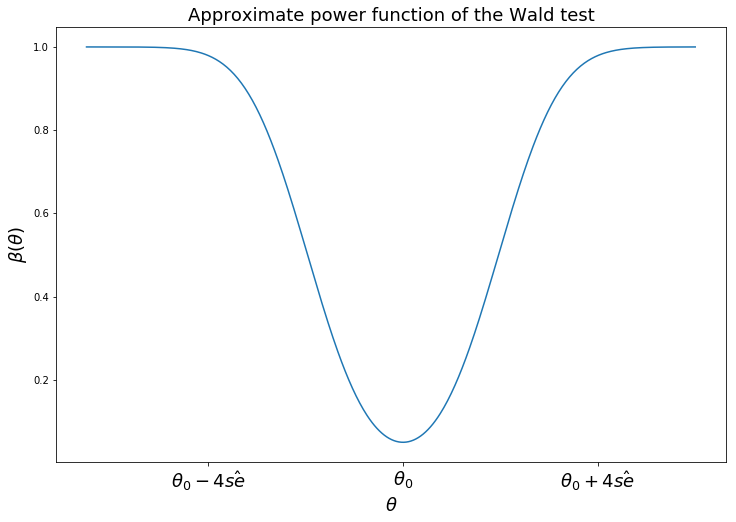

In [7]:
plt.figure(figsize = (12,8))
x = np.linspace(-10,15,500)
plt.plot(x, beta(x))
plt.title("Approximate power function of the Wald test", fontsize = 18)
plt.xlabel(r"$\theta$", fontsize = 18)
plt.ylabel(r"$\beta(\theta)$", fontsize = 18)

locs = [theta_0-4*hatse, theta_0, theta_0+4*hatse]
labels = [r"$\theta_0-4\hat{se}$", r"$\theta_0$", r"$\theta_0 + 4\hat{se}$"]
plt.xticks([theta_0-4*hatse, theta_0, theta_0+4*hatse], labels, fontsize = 18)

plt.show()

We see that the further we get from the hypothesised parameter value under $H_0$, the more powerful the test becomes.

### 1.2. How to estimate the asymptotic standard error?

If $\hat\theta_n$ is the MLE estimate then the asymptotic variance under $H_0$ is given by $I^{-1}_n(\theta_0)$. However, we often times want to use the standard error estimation from the data itself. In the MLE case, we can use $I_n^{-1}(\hat\theta_n)$, which might still be infeasible if we cannot compute the Fisher information in a neat way. In that case, we can use the \it{observed information number}:

$$\hat{I}_n(\hat{\theta_n}) = -\frac{\partial^2}{\partial\theta^2}\log L(\theta|{\bf X})\bigg|_{\theta = \hat\theta_n} $$

In the general case, we have to be careful to justify what estimate we use for the standard error.

### 1.3. The p-value

Recall the following result from a couple of lectures ago:

If a size $\alpha$ test is such that $H_0$ is rejected if and only if $T(\bf{X})\geq c_\alpha$ for some particular test statistic $T$, then the $p$-value statistics can be computed as

$$p({\bf x}) = \sup_{\theta\in\Theta_0}\mathrm{P}_{\theta}(T({\bf X})\geq T({\bf x})) $$

Thus the p value of the Wald test is given by

$$p(w) = \mathrm{P}_{\theta_0}(|W|>|w|)\approx\mathrm{P}(|Z|\geq |w|) = 2\Phi(-|w|), $$

where $w$ is the observed value of the test statistics:

$$w = \frac{\hat\theta-\theta_0}{\hat{se}}$$.

### 1.4 Examples

In [8]:
32*32*3

3072

Let us first test a prediction algorithm on a test set of size $m$ and test a second prediction algorithm on a second test set of size $n$. Let $X$ be the number of correct predictions for Algorithm 1 and $Y$ be the number of correct predictions for Algorihtm 2. Then $X\sim Binom(m,p_1)$ and $Y\sim Binom(n, p_2)$, where $p_1$ and $p_2$ is the probability of a successful prediction by Algorithm 1,2 respectively. Based on the knowledge of the incorrect predictions, we want to compare the performance of the algorithms. 

For example, let us say that we are trying to do image classification on the CIFAR 10 dataset, which consists of 60000 32 by 32 color pictures from 10 different classes. Assume that we (randomly) divide up this dataset into a training set of 55000 images and two test sets of 3000 and 2000  images respectively. Now train both a 3-Nearest Neighbor model and a multi-class Support Vector Machine on the training set (These are both very ineffective algorithms for this task). Let's say that you have a classification accuracy of $27\%$ with 3-NN and $35\%$ with SVM. Does this mean that SVM is a better algorithm?


That is if $\delta = p_2-p_1$, then we consider the test

$$H_0:\delta = 0,\qquad\textrm{vs}\qquad H_1:\delta\neq 0. $$

The MLE estimator is $\hat\delta = \hat{p}_1 -\hat{p_2}$ where $\hat{p}_1=\bar{X}$ and $\hat{p}_2 = \bar{Y}$, where $\bar X=X/m$ and $\bar Y= Y/n$ Then

$$\mathrm{Var}\hat{\delta} = \mathrm{Var}\hat{p}_1+\mathrm{Var}\hat{p}_2 = \frac{p_1(1-p_1)}{m}+\frac{p_2(1-p_2)}{n}$$

and therefor the standard error is

$$ \mathrm{se} = \sqrt{ \frac{p_1(1-p_1)}{m}+\frac{p_2(1-p_2)}{n}}.$$

Note that here $H_0$ does not fix the standard error and we have to resort to a different method. The simplest one is to use $\hat{p}_1$ and $\hat{p}_2$ in place of $p_1$ and $p_2$:

$$ \mathrm{\hat{se}} = \sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{m}+\frac{\hat{p}_2(1-\hat{p}_2)}{n}}.$$

Then the Wald statistics is then given by

$$ W = \frac{\hat\delta-0}{\hat{\mathrm{se}}} = \frac{\hat{p}_1-\hat{p_2}}{\sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{m}+\frac{\hat{p}_2(1-\hat{p}_2)}{n}}} $$

and the size $\alpha$ Wald test is given by rejecting $H_0$ whenever $|W|>z_{\alpha/2}$. In our particular example:

In [9]:
hatp1 = 0.27
hatp2 = 0.35
alpha = 0.05
m = 3000
n = 2000
hatvar1 = hatp1*(1-hatp1) / m
hatvar2 = hatp2*(1-hatp2) / n
hatse = np.sqrt(hatvar1 + hatvar2)
W = (hatp1-hatp2) / hatse
z = norm.ppf(1-alpha/2)

print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))
if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))
    
pval = 2*norm.cdf(-np.abs(W))
print("The p-value is {}".format(pval))

The test statistic: 5.971978776744882, The critical value: 1.959963984540054
The null hypothesis is rejected at size 0.05.
The p-value is 2.3439302911849317e-09


On the other hand, in standard ML practice, we compare algorithms on the same test set. Assume now that the same accuracy numbers were acheived on a common test set of $5000$ examples. In this case the test results are not independent of each other and we have to proceed differently. For each test case $i$, let $X_i=1$ if Algorithm 1 gives a correct prediction and zero otherwise. Similarly let $Y_i = 1$ indicate the correct prediction by Algorihtm 2. Let us randomly generate a possible outcome:

In [11]:
import pandas as pd
N = 5000
x = np.random.uniform(size = 5000)
y = np.random.uniform(size = 5000)
data = np.stack((x,y), axis=1)
df = pd.DataFrame(data, columns = ['x', 'y'])
df['x'] = (df['x'] < hatp1).astype(int)
df['y'] = (df['y'] < hatp2).astype(int)
df.head()

,x,y
0,0,1
1,1,0
2,0,0
3,0,0
4,0,1


In [13]:
# Some sanity check
df['x'].mean(), df['y'].mean()

(0.2742, 0.3476)

For every $i$, let us define $D_i=X_i-Y_i$:

In [14]:
df['D'] = df['x'] - df['y']
df.head()

,x,y,D
0,0,1,-1
1,1,0,1
2,0,0,0
3,0,0,0
4,0,1,-1


In this case we can naturally look at 

$$\delta = \mathrm{E}D_i=\mathrm{E}X_i-\mathrm{E}Y_i = \mathrm{P}(X_i=1) -\mathrm{P}(Y_i = 1)$$

and use this quantity to define the hypotheses above. The natural plug in estimate of $\delta$ is

$$\hat\delta = \bar{D}=\frac{1}{N}\sum_{i=1}^ND_i,$$

which is asymptotically normal by the CLT. In this case we can use the sample variance to obtain the estimated standard error of $\hat\delta$:

$$\hat{se}(\hat\delta) = \frac{S}{\sqrt{N}},\qquad S^2=\frac{1}{N-1}\sum_{i=1}^N(D_i-\bar D)^2$$

Thus, the Wald statistics becomes

$$W = \frac{\hat\delta}{\hat{se}(\hat\delta)}=\sqrt{\frac{N-1}{N}}\frac{\sum_{i=1}^ND_i}{\sqrt{\sum_{i=1}^N(D_i-\bar D)^2}}$$

and the Wald test is given by rejecting $H_0$ if $|W|>z_{\alpha/2}$.

On our particular example, we have:

In [22]:
W = df['D'].mean() / (df['D'].std()/np.sqrt(N))
z = norm.ppf(1-alpha/2)

print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))
if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))
    
pval = 2*norm.cdf(-np.abs(W))
print("The p-value is {}".format(pval))

The test statistic: 7.977345757066305, The critical value: 1.959963984540054
The null hypothesis is rejected at size 0.05.
The p-value is 1.495135647177714e-15


## 2. The $t$-test

When we have a small sample, then the normal approximation might be very bad. However, if we can reasonably assume that our data is normally distributed, then we can use the explicit distributions computed in the second lecture to construct good tests. For example, let us assume that $X_1, X_2,\dots,X_n$ are i.i.d. normals from the distribution $\mathcal{N}(\mu,\sigma^2)$, where both $\mu$ and $\sigma$ are unknown. Consider the test

$$ H_0:\mu=\mu_0\qquad\textrm{vs.}\qquad H_1:\mu\neq\mu_0 $$.

We have seen that the statistic

$$ T_n = \frac{\sqrt{n}(\bar X_n - \mu_0)}{S_n} $$

has a Student $t_{n-1}$ distribution. Of course, for large $n$, the distributions $t_{n-1}$ and $\mathcal{N}(0,1)$ are extremely similar and the Wald test is a reasonable approximation. However, for smaller samples we should use the $t$ distribution. Recall that if $t_k$ is the Student distribution with $k$ degrees of freedom, then its density function is given by

$$f(t)=\frac{\Gamma\left(\frac{k+1}{2}\right)}{\sqrt{k\pi}\Gamma\left(\frac{k}{2}\right)} \frac{1}{\left(1+\frac{t^2}{k}\right)^{\frac{k+1}{2}}}$$

It is a good exercise to show that as $k\to\infty$, this function converges to the standard normal pdf (might want to look up Stirling's formula for the Gamma function). Graphically:

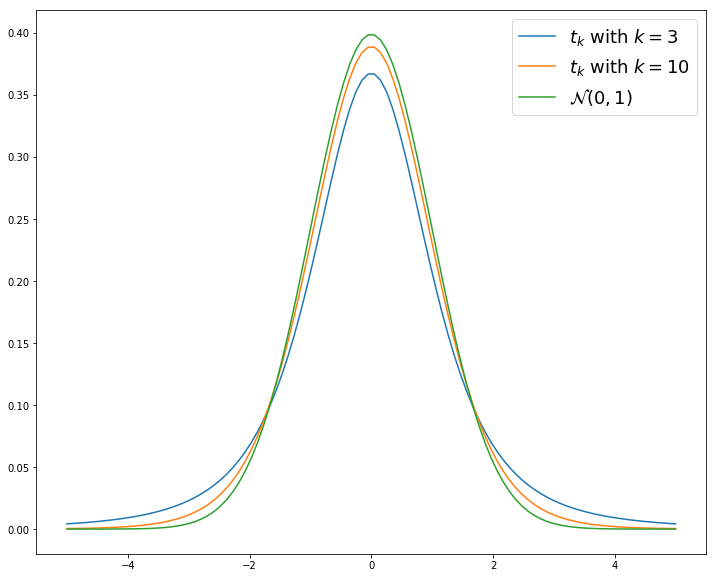

In [17]:
from scipy.stats import t
k1 = 3
k2 = 10
tpdf = lambda x: t.pdf(x,k)
x = np.linspace(-5, 5, 100)
plt.figure(figsize = (12,10))
plt.plot(x,t.pdf(x, k1), label = r"$t_k$ with $k=${}".format(k1))
plt.plot(x,t.pdf(x, k2), label = r"$t_k$ with $k=${}".format(k2))
plt.plot(x,norm.pdf(x), label =r"$\mathcal{N}(0,1)$")
plt.legend(loc = 'best', fontsize = 18)
plt.show()

The $t$-test is then defined by rejecting $H_0$ if $|T|>t_{n-1,\alpha/2}$. For example:

In [18]:
alpha = 0.05
n = 5
zalpha = norm.ppf(1-alpha/2)
talpha = t.ppf(1-alpha/2, n)
zalpha,talpha

(1.959963984540054, 2.5705818366147395)

Again for large $n$, this is essentially equivalent to the Wald test:

In [19]:
n = 1000
talpha = t.ppf(1-alpha/2,n)
zalpha = norm.ppf(1-alpha/2)
talpha-zalpha

0.002375096286353351

## 3. Pearson's $\chi^2$-test

This test can be used for multinomial data. Recall that $X=(X_1,...,X_k)$ has a multinomial $(n,p_1,\dots, p_k)$ distribution if 

$$\mathrm{P}(X_1 = n_1,\dots, X_k = n_k)=\binom{n}{n_1,n_2,\dots, n_k}p_1^{n_1}p_2^{n_2}\dots p_k^{n_k}. $$

Note that $\binom{n}{n_1,n_2,\dots, n_k} = 0$ when $n_1+\dots+n_k \neq n$. While this looks like one sample point, it is usually the result of $n$ independent, "multinoulli" trials, i.e.

$$ X=\sum_{i=1}^nX^{(i)},\qquad \mathrm{P}\left(X_j^{(i)}=1, X_{l}^{(i)}=0, l \neq j)\right).$$

It can be shown that the MLE for the parameter vector $p=(p_1,\dots,p_k)$ is given by

$$\hat p =(\hat p_1,\dots,\hat p_k)=(X_1/n,\dots, X_k/n) $$.

Now consider the test 

$$H_0: p = p_0\qquad\textrm{vs.}\qquad p \neq p_0$$

for some fixed $p_0=(p_{01},\dots, p_{0k})$.

### 3.1. The test statistics

What should we choose for a test statistics? Pearson's $\chi^2$ statistics is defined as

$$T_n = \sum_{j=1}^k\frac{(X_j-np_{0j})^2}{np_{0j}} $$.

It can be shown that under $H_0$, $T_n$ converges to $\chi_{k-1}^2$. We do not prove this result but note that each individual $X_j\sim\mathrm{Binom}(n,p_{0j})$ with expectation $np_{0j}$ and variance $np_{0j}(1-p_{0j})$. This means that for large enough $n$, $\frac{(X_j-np_{0j})^2}{np_{0j}}$ is approximately $(1-p_{0j})^{-1}\left[\mathcal{N}(0,1)\right]^2$. The second ingredient is that we must have $X_1+\dots+X_k=n$ and therefore the "degree of freedom is only $k-1$. The rest are technicalities. Recall that the $\chi_{k}^2$ distribution has pdf

$$f(x)=\frac{x^{\frac{k}{2}-1}e^{-x/2}}{2^{k/2}\Gamma(k/2)} $$

Plotting it:

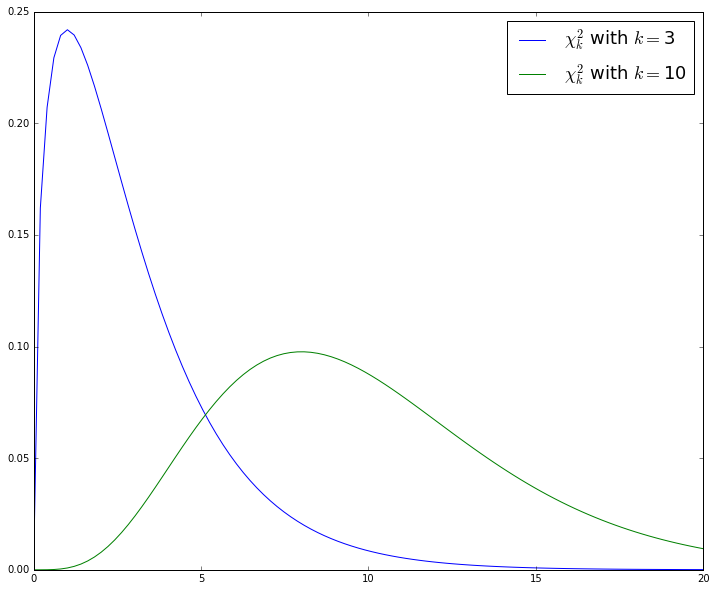

In [130]:
from scipy.stats import chi2
k1 = 3
k2 = 10
x = np.linspace(0, 20, 100)
plt.figure(figsize = (12,10))
plt.plot(x,chi2.pdf(x, k1), label = r"$\chi_k^2$ with $k=${}".format(k1))
plt.plot(x,chi2.pdf(x, k2), label = r"$\chi_k^2$ with $k=${}".format(k2))
plt.legend(loc = 'best', fontsize = 18)
plt.show()

Therefore, the $\chi^2$-test is given by rejecting $H_0$ if and only if $\chi_{k-1,\alpha}^2$, which is a size $\alpha$ test. The $p$-value is given by

$$p(t)=\mathbb{P}(\chi_{k-1}^2>t)$$

### 3.2. An example

Gregor Mendel bred peas with round yellow seeds and winkled green seed. There are four types of progeny: round yellow, wrinkled yellow, round green, and wrinkled green. The number of each type is multinomial with probability $p=(p_1,p_2,p_3,p_4)$. His theory of inheritance predicts

$$p_0=\left(\frac{9}{16},\frac{3}{16},\frac{3}{16},\frac{1}{16}\right)$$

In $n= 556$ trials, he observed $X=(315, 101, 108, 32)$. We will test

$$H_0: p=p_0\qquad\textrm{vs.}\qquad H_1: p\neq p_0 $$

In [152]:
n = 556
alpha = 0.05
p0 = np.array([9/16, 3/16, 3/16, 1/16])
X = np.array([315, 101,108,32])
EX = n*p0
T = np.sum(((X-EX) ** 2)/EX)

t = chi2.ppf(1-alpha, 3)

print("The test statistic: {}, The critical value: {}".format(T,t))
if T > t:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))
    
pval = 1-chi2.cdf(T,3)
print("The p-value is {}".format(pval))

The test statistic: 0.4700239808153477, The critical value: 7.8147279032511765
Failed to reject the null hypothesis at size 0.05.
The p-value is 0.925425895103616


Therefore the data does not contradict Mendel's theory.

### 3.3. $\chi^2$-test in Python

Of course, Python has its own method to do the test in one line of code:

In [151]:
from scipy.stats import chisquare

chisquare(X, EX)

Power_divergenceResult(statistic=0.47002398081534769, pvalue=0.92542589510361595)

## 4. Permutation test

The permutation test is a nonparametric method for testing whether two distributions are the same. It is an exact test in the sense that it does not rely on large samples. Suppose $X_1,\dots,X_m\sim F_X$ and $Y_1,\dots,Y_n\sim F_Y$ are two independent samples and consider

$$H_0: F_X = F_Y,\qquad\textrm{vs.}\qquad H_1: F_X\neq F_Y.$$

Let $T(x_1,\dots,x_m,y_1,\dots y_n)$ be some test statistic, e.g.,

$$T(X_1,\dots,X_m, Y_1,\dots, Y_n)=|\bar{X}_m-\bar{Y}_n|$$

Let $N=m+n$ and consider the value of $T$ under all $N!$ permutations of the data:

$$T_1,\dots,T_{N!}$$

The idea of the permutation test is that under $H_0$, each of these values should be equally likely. Let us define the permutation distribution as the one that puts mass $1/N!$ on each $T_j$. Then at size $\alpha$, we reject $H_0$ if $p(t)<\alpha$, where

$$p(t)=\frac{1}{N!}\sum_{j=1}^{N!}\mathbb{1}_{\{T_j> t\}}.$$

In other words, if the observed value of $T$ is $t$, then we reject $H_0$ if the fraction of the permutations in which $T_j$ would be larger than $t$ is less than $\alpha$. Thus $p(t)$ naturally becomes the $p$-value of the test$.

### 4.1. An example

Suppose the data are $(X_1,X_2,Y_1)=(1,9,3)$ and let $T(X_1,X_2,Y_1)=|\bar{X}-\bar{Y}|=|5-3| = 2$.

In [158]:
import itertools
table = []
perms = list(itertools.permutations([1, 9, 3]))
for perm in perms:
    table.append([perm, np.abs((perm[0]+perm[1])/2 - perm[2])])
    
print("Permutation   T")
for tab in table:
    print(tab)

Permutation   T
[(1, 9, 3), 2.0]
[(1, 3, 9), 7.0]
[(9, 1, 3), 2.0]
[(9, 3, 1), 5.0]
[(3, 1, 9), 7.0]
[(3, 9, 1), 5.0]


Thus the p-value is given by

In [166]:
def pval(t):
    p = 0
    for tabl in table:
        if tabl[1] > t:
            p += 1
            
    p /= len(table)
    return p

print("The p-value of this test: {}".format(pval(2)))
alpha = 0.05

if pval(2) < alpha:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))

The p-value of this test: 0.6666666666666666
Failed to reject the null hypothesis at size 0.05.


### 4.2 Permutation test for large samples

For large samples, $N!$ might be a huge number and it is impractival to evaluate all permutations. Instead, we can approximate the $p$-value by sampling randomly from all sets of permutations:

In [173]:
B = 3

table = []
for i in range(B):
    rand_perm = list(np.random.permutation([1,9,3]))
    table.append([rand_perm,  np.abs((rand_perm[0]+rand_perm[1])/2 - rand_perm[2])])
    
print("Permutation   T")
for tab in table:
    print(tab)

Permutation   T
[[3, 1, 9], 7.0]
[[1, 3, 9], 7.0]
[[1, 9, 3], 2.0]


In [174]:
print("The p-value of this test: {}".format(pval(2)))
alpha = 0.05

if pval(2) < alpha:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))

The p-value of this test: 0.6666666666666666
Failed to reject the null hypothesis at size 0.05.


Of course, on this toy example, we could just evaluate all permutations. However on large datasets, this can be a very useful approximation.

## 5. Goodness of fit tests

It is a natural task in statistics to make decisions on whether a certain data-stream is generated by a particular distribution or family of distributions.

### 5.1. $\chi^2$ GOFT for a discrete fixed distribution

In this setting, we have a sample $X_1,\dots, X_n$ with $\mathcal{P}(X_i=j)=p_j$. If this reminds you of the $\chi^2$-test above, that is no coincidence. In fact, if the $X_i$-s can take finitely many values, then we can introduce $\tilde{X}_i$ as the vector with exactly one unit entry at the $j$th position where $X_i = j$. Then $X = \sum_{i=1}^n\tilde{X}_i$ has a multinomial distribution and the $\chi^2$-test applies.

You can think about the above procedure as dividing the sample into buckets and then running $\chi$-square test on the buckets. If the $X_i$-s can take infinitely many values, then we introduce a bucket $\{x_i>K\}$ and in this case the corresponding probability is $p_{K+1}=\mathrm{P}(X_i>K)$.

### 5.2. $\chi^2$ GOFT for a continuous fixed distribution

We can extend our bucket scheme to this case by taking the pdf $f(x)$ and associating the buckets with intervals (or boxes in higher dimensions) $I_1,\dots, I_n$, where the union of these intervals cover all values the $X_i$-s can take. Then assign probabilities to the resulting buckets by

$$p_j = \int_{I_j}f(x)dx$$

Then we can do a $\chi^2$-test again.

### 5.3. Kolmogorov-Smirnov GOFT

There is an alternative based on comparing the empirical distribution function to the hypothesized CDF. We have tangetially seen that if $\hat{F}_n$ is the ECDF, then the Kolmogorov theorem implies

$$\mathrm{P}\left(\sqrt{n}\sup_{x\in\mathbb{R}}|\hat{F}_n(x)-F(x)|<z\right)\to\mathbb{1}_{\{z>0\}}\left[1-2\sum_{i=1}^\infty(-1)^{i-1}e^{-2i^2z^2}\right],$$

where the right hand side is the CDF of the Kolmogorov distribution $K$.

Define a test with null hypothesis $H_0$ given by $F(x) = F_0(x)$ and introduce the Kolmogorov-Smirnov statistics $D_n(x) = \sup_{x\in\mathbb{R}}|\hat{F}_n(x)-F_0(x)|$. The Kolmogorov-Smirnov test is given by rejecting $H_0$ if $\sqrt{n}D_n > K_\alpha$, where $K_\alpha$ is the $\alpha$ quantile of the Kolmogorov distribution.

### 5.4. Parametric family GOFT

We often use parametric models (for example, we did that a lot in this class). In this case we consider a family of distributions $\mathcal{F}=\{f(x,\theta): \theta\in\Theta\}$ parametrized by an $s$-dimensional parameter vector $\theta=(\theta_1,\dots, \theta_s)$. Again, we can divide the line into $k$ disjoint intervals ("buckets") $I_1,\dots,I_k$ and assign the probabilites

$$p_j(\theta)=\int_{I_j}f(x|\theta)dx.$$

Assume that in the data $N_j$ datapoints fall into $I_j$. The likelihood for $\theta based on these counts is the multinomial likelihood

$$Q(\theta)=\prod_{j=1}^kp_i(\theta)^{N_j}$$

Let $\tilde\theta$ be the maximizer of $Q(\theta)$. 

WARNING: This is NOT the MLE of $\theta$ in the original model! 

Then form the test statistic

$$ Q = \sum_{j=1}^k\frac{(N_j-np_j(\tilde\theta))^2}{np_j(\tilde\theta)}$$.

It can be shown that under null hypothesis (namely, that the distribution comes from this parametric family), $Q$ converges in distribution to $\chi^2_{k-1-s}$. Thus, we do a $\chi^2$-test with $k-1-s$ degrees of freedom. The $p$-value is given by

$$\mathrm{P}(q)=\mathrm{P}(\chi_{k-1-s}^2>q).$$

**EXERCISE:** Play around with these tests and find some examples to test. From the stats package documentation (google it), familiarize yourself with the commands that do these tests for you automatically. This is going to come useful in your project.